In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [22]:
# Read data
data = pd.read_csv ("galton-families.csv")
data = data.dropna()
print('Shape: ', data.shape)
data = pd.get_dummies(data, columns=['gender'])
print('Columns: ', list(data.columns))
data.describe(include='all').transpose()

Shape:  (934, 9)
Columns:  ['serno', 'family', 'father', 'mother', 'midparentHeight', 'children', 'childNum', 'childHeight', 'gender_female', 'gender_male']


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
serno,934,NaN,NaN,NaN,467.5,269.767,1,234.25,467.5,700.75,934
family,934,205,185,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
father,934,NaN,NaN,NaN,69.1971,2.47648,62,68,69,71,78.5
mother,934,NaN,NaN,NaN,64.0893,2.29089,58,63,64,65.875,70.5
midparentHeight,934,NaN,NaN,NaN,69.2068,1.80237,64.4,68.14,69.248,70.14,75.43
children,934,NaN,NaN,NaN,6.17131,2.72903,1,4,6,8,15
childNum,934,NaN,NaN,NaN,3.58565,2.36141,1,2,3,5,15
childHeight,934,NaN,NaN,NaN,66.7459,3.57925,56,64,66.5,69.7,79
gender_female,934,NaN,NaN,NaN,0.485011,0.500043,0,0,0,1,1
gender_male,934,NaN,NaN,NaN,0.514989,0.500043,0,0,1,1,1


In [40]:
X = data[['father', 'mother', 'gender_female', 'gender_male', 'childNum']]
y = data[['childHeight']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

# Linear model

Score: 0.6731566952156719
Coefficients:  [[ 0.34284418  0.30221217 -2.02010061  2.02010061 -0.41973   ]]
Mean squared error: 4.23
Variance score: 0.67


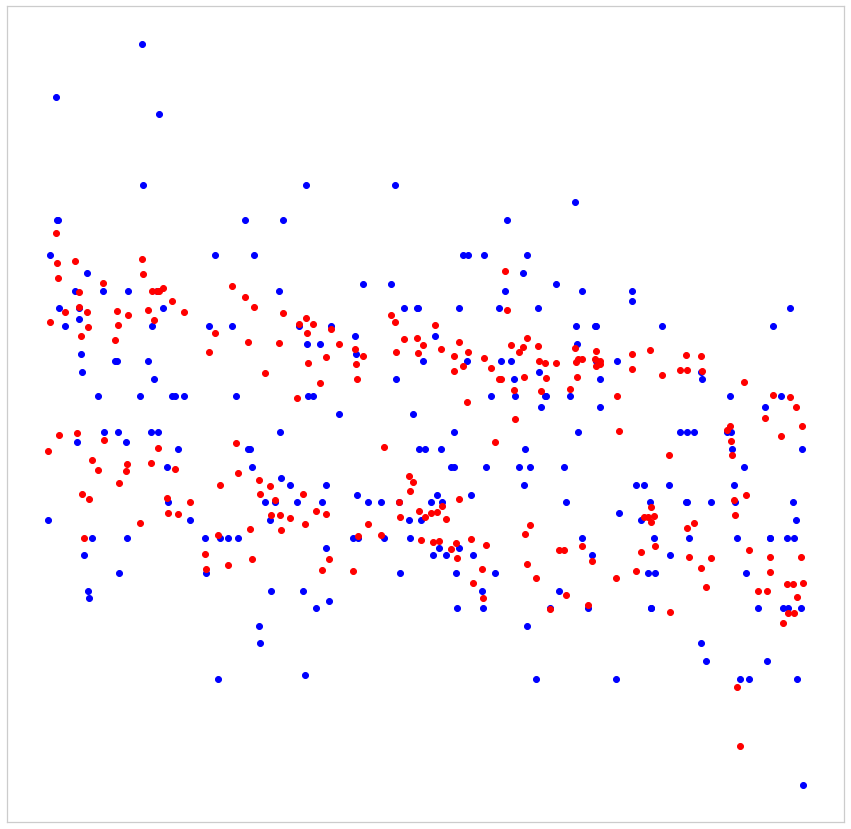

In [41]:
reg = LinearRegression().fit(X_train, y_train)
# Make predictions on test data
y_pred = reg.predict(X_test)
print('Score: ' + str(reg.score(X_test, y_test)))

# The coefficients
print('Coefficients: ', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.figure(figsize=(15,15))
plt.scatter(X_test.index, y_test, color='blue')
plt.scatter(X_test.index, y_pred, color='red')
plt.xticks(())
plt.yticks(())
plt.show()

# Stochastic Gradient Descent

In [42]:
sgd = SGDRegressor(max_iter=10000, tol=1e-3).fit(X_train, y_train)
# Make predictions on test data
sgd_pred = sgd.predict(X_test)
print('SGD Score: ' + str(sgd.score(X_test, y_test)))
# The coefficients
print('SGD Coefficients: ', sgd.coef_)
# The mean squared error
print("SGD Mean squared error: %.2f" % mean_squared_error(y_test, sgd_pred))
# Explained variance score: 1 is perfect prediction
print('SGD Variance score: %.2f' % r2_score(y_test, sgd_pred))

SGD Score: -2.2544373644092196e+23
SGD Coefficients:  [ 7.15369114e+10 -6.35629988e+10 -1.47613753e+09 -7.91297784e+09
  2.20628617e+11]
SGD Mean squared error: 2920774379016580801495040.00
SGD Variance score: -225443736440921957335040.00


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard_scaled = pd.DataFrame(scaler.fit_transform(X),
                                 columns = ['father', 'mother', 'gender_female', 'gender_male', 'childNum'])
X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, random_state=7)

# Deep neural Network

In [44]:
# Keras and TensorFlow imports for Deep Learning
import keras
import tensorflow as tf

# for defining the Neural-net
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam, RMSprop

def build_model():
    network = Sequential()
    layer_1 = Dense(128, input_shape = (X_train.shape[1],), activation='tanh')
    layer_2 = Dense(128, activation='tanh')
    #layer_3 = Dense(64, activation='tanh')
    layer_4 = Dense(1)
    
    network.add(layer_1)
    network.add(Dropout(0.2))
    network.add(layer_2)
    #network.add(Dropout(0.2))
    #network.add(layer_3)
    network.add(layer_4)
    network.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mse'])
    return network

model = build_model()
model.summary()

model.fit(X_train, y_train, epochs=150, batch_size=10)
y_hat = model.predict(X_test)
rsquared  = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
print(f"Model coefficient of determination, R^2={rsquared}")
print(f"MSE: {mse}")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               768       
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 129       
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
700/700 [==============================] - 1s 2ms/step - loss: 4252.1733 - mean_squared_error: 4252.1733
Epoch 2/150
700/700 [==============================] - 0s 369us/step - loss: 2404.8719 - mean_squared_error: 2404.8719
Epoch 3/150
700/700 [=============

# Model to regress parent's height from child's

In [45]:
X = data[['childHeight', 'mother', 'gender_female', 'gender_male', 'childNum']]
y = data[['father']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [46]:
reg = LinearRegression().fit(X_train, y_train)
# Make predictions on test data
y_pred = reg.predict(X_test)
print('Score: ' + str(reg.score(X_test, y_test)))

# The coefficients
print('Coefficients: ', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Score: 0.1471894046363088
Coefficients:  [[ 0.4377165  -0.10596236  1.24555043 -1.24555043  0.00922934]]
Mean squared error: 4.97
Variance score: 0.15


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d772550>,
      dtype=object)

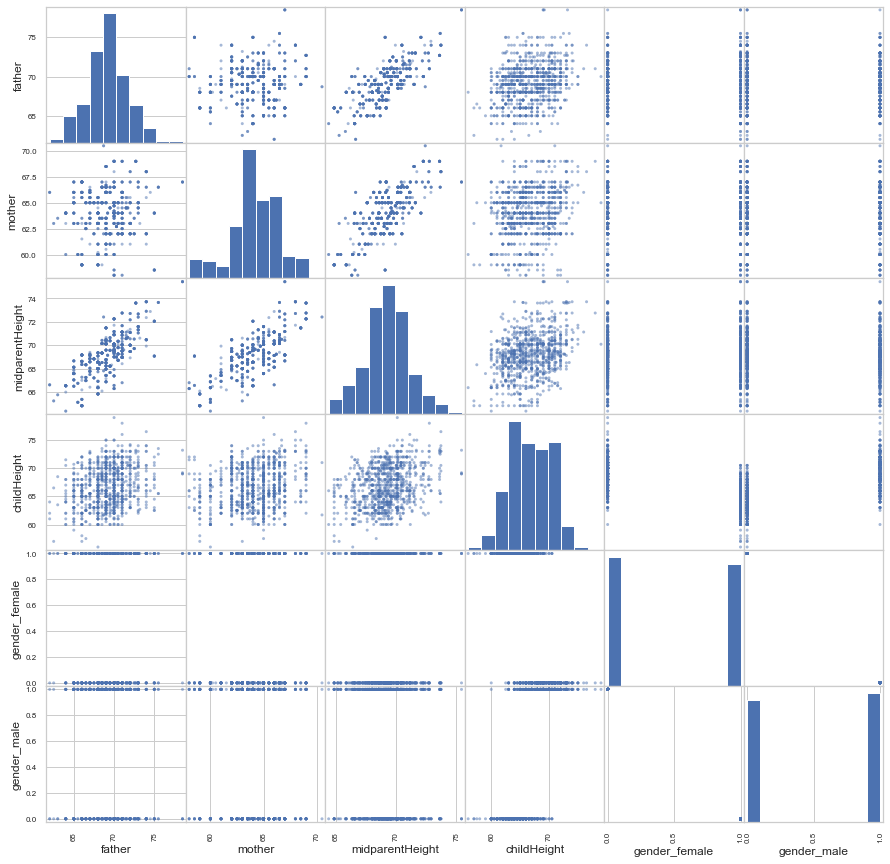

In [6]:
newdf = data.drop(columns=['serno', 'family', 'children', 'childNum'])
scatter_matrix(newdf, figsize=(15,15))